# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import Splinter and BeautifulSoup
# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
# Open a Chrome window using Splinter
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Set the url to visit
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

# Use the browser to visit the url
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html

# soupify
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
# Find the parent container
table = soup.find("table", {"class": "table"})
print(table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
dfs = pd.read_html(str(table))
df = dfs[0]
df.head()

/var/folders/vm/5497fvmj70sd__l1pr_2rxv00000gn/T/ipykernel_10129/3552763735.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [8]:
# Assuming df is the DataFrame you created from the HTML table
# Convert data types for specific columns
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Rename columns
df = df.rename(columns={
    'id': 'ID',
    'terrestrial_date': 'Terrestrial Date',
    'sol': 'Sol',
    'ls': 'LS',
    'min_temp': 'Min Temp',
    'pressure': 'Pressure'
})

# Display the updated DataFrame
df

,ID,Terrestrial Date,Sol,LS,month,Min Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1867 non-null   int64         
 1   Terrestrial Date  1867 non-null   datetime64[ns]
 2   Sol               1867 non-null   int64         
 3   LS                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   Min Temp          1867 non-null   float64       
 6   Pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [10]:
# 1. How many months are there on Mars?
unique_months = df['month'].nunique()
unique_months

12

In [11]:
# 2. How many Martian days' worth of data are there?
max = df["Sol"].max()
min = df["Sol"].min()
mars_days = max - min
mars_days

1967

In [12]:
# 3. What is the average low temperature by month?
low_temp = df["Min Temp"].groupby(df['month']).mean()
low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: Min Temp, dtype: float64

In [13]:
low_temp_df = pd.DataFrame(low_temp).reset_index()
low_temp_df.columns = ['Month', 'Average_Low_Temperature']
low_temp_df

,Month,Average_Low_Temperature
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


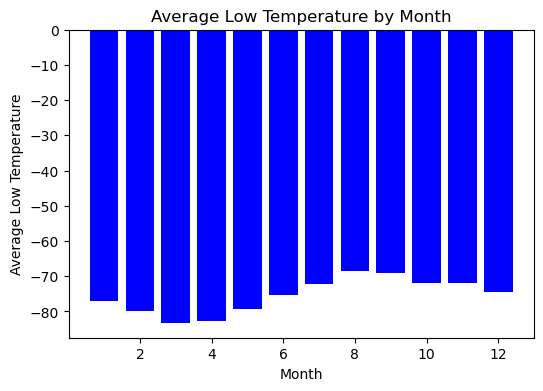

In [18]:
# Plot the average temperature by month
plt.figure(figsize=(6, 4))
plt.bar(low_temp_df['Month'], low_temp_df['Average_Low_Temperature'], color='blue')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature by Month')

# Show the plot
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location
warmest = low_temp.idxmax()
coldest = low_temp.idxmin()

print(f"the coldest month is {coldest} and the warmest month is {warmest}")

the coldest month is 3 and the warmest month is 8


In [23]:
# 4. Average pressure by Martian month
pressure = df["Pressure"].groupby(df['month']).mean()
pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64

In [25]:
pressure = df["Pressure"].groupby(df['month']).mean()

# Create a DataFrame from the pressure Series
pressure_df = pd.DataFrame(pressure).reset_index()
pressure_df.columns = ['Month', 'Average Pressure']

pressure_df

,Month,Average Pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


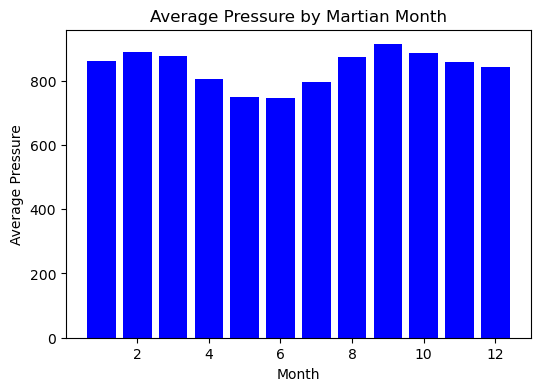

In [28]:
# Plot the average pressure by month
plt.figure(figsize=(6, 4))
plt.bar(pressure_df['Month'], pressure_df['Average Pressure'], color='blue')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Martian Month')

# Show the plot
plt.show()






In [29]:
df

,ID,Terrestrial Date,Sol,LS,month,Min Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


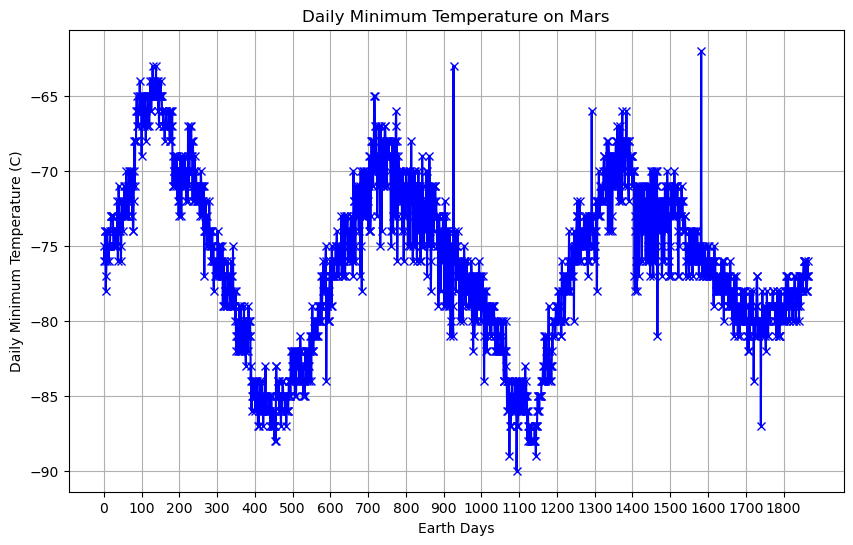

In [33]:
# Calculate the duration of a Martian year in Earth days
# Plot the daily minimum temperature data against Earth days
plt.figure(figsize=(10, 6))
plt.plot(range(len(df)), df['Min Temp'], marker='x', color='b', linestyle='-')
plt.xlabel('Earth Days')
plt.ylabel('Daily Minimum Temperature (C)')
plt.title('Daily Minimum Temperature on Mars')
plt.grid(True)
plt.xticks(range(0, len(df), 100), range(0, len(df), 100))
plt.show()

In [34]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# first day LS is at 155 - find second time LS = 155
# Filter the DataFrame for rows where LS equals 155
ls_155_df = df[df['LS'] == 155]

# Find the index of the second occurrence of LS equals 155
first_ls_155_index = ls_155_df.index[0]
second_ls_155_index = ls_155_df.index[1]

# Get the date when LS equals 155 for the second time
first_ls_155_date = df.loc[first_ls_155_index, 'Terrestrial Date']
second_ls_155_date = df.loc[second_ls_155_index, 'Terrestrial Date']

martian_year = (second_ls_155_date - first_ls_155_date)
martian_year

Timedelta('686 days 00:00:00')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [35]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [36]:
browser.quit()